# Assignment 10 - Akash

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import urllib2
import scipy.stats as stats

url = ('https://raw.githubusercontent.com/Upward-Spiral-Science/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:] # Remove lable row

# Clip data based on thresholds on x and y coordinates. Found from Bijan visual
x_bounds = (409, 3529)
y_bounds = (1564, 3124)

def check_in_bounds(row, x_bounds, y_bounds):
    if row[0] < x_bounds[0] or row[0] > x_bounds[1]: #check x inbounds
        return False
    if row[1] < y_bounds[0] or row[1] > y_bounds[1]: #check y inbounds
        return False
    if row[3] == 0:                                  # remove zeros of unmasked values
        return False
    return True

indices_in_bound = np.where(np.apply_along_axis(check_in_bounds, 1, csv, x_bounds, y_bounds))
data_clipped = csv[indices_in_bound]

density = np.divide(data_clipped[:, 4],data_clipped[:, 3])*(64**3)

data_density = np.vstack((data_clipped[:,0],data_clipped[:,1],data_clipped[:,2],density))
data_density = data_density.T

print 'End removing zero unmasked and removing image edges'

End removing zero unmasked and removing image edges


## Set up different sections of data based on clusters of 3 and regressions

Borders of clusters from visual estimate of previous homework cluster visuals (emily)

In [14]:
#edges of k-means, k = 3 clusters
cluster3x1bounds = (409,1500)
cluster3x2bounds = (1501,2500)
cluster3x3bounds = (2501,3529)

#edges of k-means, k = 4 clusters
cluster4x1bounds = (409,1100)
cluster4x4bounds = (2750,3529)

def check_in_cluster(row, x_bounds):
    if row[0] < x_bounds[0] or row[0] > x_bounds[1]: #check x inbounds
        return False
    return True

indices_in_bound = np.where(np.apply_along_axis(check_in_cluster, 1, data_density, cluster3x1bounds))
data_k3_1 = data_density[indices_in_bound]

indices_in_bound = np.where(np.apply_along_axis(check_in_cluster, 1, data_density, cluster3x2bounds))
data_k3_2 = data_density[indices_in_bound]

indices_in_bound = np.where(np.apply_along_axis(check_in_cluster, 1, data_density, cluster3x3bounds))
data_k3_3 = data_density[indices_in_bound]

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.pipeline import Pipeline
from sklearn import cross_validation

names = ['Linear Regression','SVR','KNN Regression','Random Forest Regression','Polynomial Regression']
regressions = [LinearRegression(),
               LinearSVR(C=1.0),
               KNN(n_neighbors=10, algorithm='auto'),
               RF(max_depth=5, max_features=1),
               Pipeline([('poly', PF(degree=2)),('linear', LinearRegression(fit_intercept=False))])]
k_fold = 10


## Start regressions in cluster

### 1.1) Cluster of 3, check 1st cluster

In [20]:
print('Regression on X=(x,y,z), Y=syn/unmasked')
X = data_k3_1[:, (0, 1, 2)] # x,y,z
Y = data_k3_1[:, 3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))


# x 
print
print('Regressions on x and density')
X = data_k3_1[:,[0]] # x,y,z
Y = data_k3_1[:,3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))

# y 
print
print('Regression on y and density')
X = data_k3_1[:,[1]] # x,y,z
Y = data_k3_1[:,3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))

# z -> syn/unmasked
print
print('Regression on z and density')
X = data_k3_1[:,[2]] # x,y,z
Y = data_k3_1[:,3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))

Regression on X=(x,y,z), Y=syn/unmasked
R^2 of Linear Regression: 	 0.16 (+/- 0.11)
R^2 of SVR: 	 -1.28 (+/- 2.02)
R^2 of KNN Regression: 	 0.31 (+/- 0.14)
R^2 of Random Forest Regression: 	 0.15 (+/- 0.44)
R^2 of Polynomial Regression: 	 0.22 (+/- 0.11)

Regressions on x and density
R^2 of Linear Regression: 	 -0.01 (+/- 0.02)
R^2 of SVR: 	 -1.66 (+/- 3.55)
R^2 of KNN Regression: 	 -0.57 (+/- 1.15)
R^2 of Random Forest Regression: 	 -0.23 (+/- 0.36)
R^2 of Polynomial Regression: 	 -0.01 (+/- 0.03)

Regression on y and density
R^2 of Linear Regression: 	 0.16 (+/- 0.11)
R^2 of SVR: 	 -2.06 (+/- 6.48)
R^2 of KNN Regression: 	 0.07 (+/- 0.15)
R^2 of Random Forest Regression: 	 0.17 (+/- 0.11)
R^2 of Polynomial Regression: 	 0.17 (+/- 0.11)

Regression on z and density
R^2 of Linear Regression: 	 -0.01 (+/- 0.02)
R^2 of SVR: 	 -1.26 (+/- 3.52)
R^2 of KNN Regression: 	 -0.10 (+/- 0.12)
R^2 of Random Forest Regression: 	 0.05 (+/- 0.05)
R^2 of Polynomial Regression: 	 0.03 (+/- 0.04)


### 1.2) 2nd cluster

In [19]:
print('Regression on X=(x,y,z), Y=syn/unmasked')
X = data_k3_2[:, (0, 1, 2)] # x,y,z
Y = data_k3_2[:, 3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))


# x 
print
print('Regressions on x and density')
X = data_k3_2[:,[0]] # x,y,z
Y = data_k3_2[:,3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))

# y 
print
print('Regression on y and density')
X = data_k3_2[:,[1]] # x,y,z
Y = data_k3_2[:,3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))

# z -> syn/unmasked
print
print('Regression on z and density')
X = data_k3_2[:,[2]] # x,y,z
Y = data_k3_2[:,3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))

Regression on X=(x,y,z), Y=syn/unmasked
R^2 of Linear Regression: 	 0.08 (+/- 0.17)
R^2 of SVR: 	 -0.30 (+/- 0.89)
R^2 of KNN Regression: 	 0.30 (+/- 0.11)
R^2 of Random Forest Regression: 	 0.20 (+/- 0.08)
R^2 of Polynomial Regression: 	 0.16 (+/- 0.16)

Regressions on x and density
R^2 of Linear Regression: 	 -0.02 (+/- 0.04)
R^2 of SVR: 	 -2.25 (+/- 5.29)
R^2 of KNN Regression: 	 -0.26 (+/- 0.31)
R^2 of Random Forest Regression: 	 -0.19 (+/- 0.32)
R^2 of Polynomial Regression: 	 -0.01 (+/- 0.01)

Regression on y and density
R^2 of Linear Regression: 	 0.08 (+/- 0.16)
R^2 of SVR: 	 -3.09 (+/- 5.45)
R^2 of KNN Regression: 	 -0.03 (+/- 0.23)
R^2 of Random Forest Regression: 	 0.10 (+/- 0.16)
R^2 of Polynomial Regression: 	 0.09 (+/- 0.16)

Regression on z and density
R^2 of Linear Regression: 	 -0.01 (+/- 0.02)
R^2 of SVR: 	 -0.46 (+/- 1.48)
R^2 of KNN Regression: 	 -0.13 (+/- 0.17)
R^2 of Random Forest Regression: 	 0.03 (+/- 0.03)
R^2 of Polynomial Regression: 	 0.02 (+/- 0.04)


### 1.3) 3rd cluster

In [21]:
print('Regression on X=(x,y,z), Y=syn/unmasked')
X = data_k3_3[:, (0, 1, 2)] # x,y,z
Y = data_k3_3[:, 3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))


# x 
print
print('Regressions on x and density')
X = data_k3_3[:,[0]] # x,y,z
Y = data_k3_3[:,3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))

# y 
print
print('Regression on y and density')
X = data_k3_3[:,[1]] # x,y,z
Y = data_k3_3[:,3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))

# z -> syn/unmasked
print
print('Regression on z and density')
X = data_k3_3[:,[2]] # x,y,z
Y = data_k3_3[:,3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))

Regression on X=(x,y,z), Y=syn/unmasked
R^2 of Linear Regression: 	 0.16 (+/- 0.15)
R^2 of SVR: 	 -0.95 (+/- 1.86)
R^2 of KNN Regression: 	 0.38 (+/- 0.17)
R^2 of Random Forest Regression: 	 0.24 (+/- 0.15)
R^2 of Polynomial Regression: 	 0.24 (+/- 0.18)

Regressions on x and density
R^2 of Linear Regression: 	 -0.00 (+/- 0.01)
R^2 of SVR: 	 -1.52 (+/- 3.02)
R^2 of KNN Regression: 	 -0.23 (+/- 0.38)
R^2 of Random Forest Regression: 	 -0.19 (+/- 0.22)
R^2 of Polynomial Regression: 	 -0.00 (+/- 0.01)

Regression on y and density
R^2 of Linear Regression: 	 0.15 (+/- 0.15)
R^2 of SVR: 	 -1.49 (+/- 2.53)
R^2 of KNN Regression: 	 0.09 (+/- 0.18)
R^2 of Random Forest Regression: 	 0.19 (+/- 0.16)
R^2 of Polynomial Regression: 	 0.18 (+/- 0.17)

Regression on z and density
R^2 of Linear Regression: 	 -0.01 (+/- 0.02)
R^2 of SVR: 	 -1.72 (+/- 4.64)
R^2 of KNN Regression: 	 -0.05 (+/- 0.06)
R^2 of Random Forest Regression: 	 0.04 (+/- 0.05)
R^2 of Polynomial Regression: 	 0.01 (+/- 0.05)


## 2) Set up 4 clusters

In [22]:
#edges of k-means, k = 4 clusters, Not sure how to get full clusters

cluster4x1bounds = (409,1100)
cluster4x4bounds = (2750,3529)

def check_in_cluster(row, x_bounds):
    if row[0] < x_bounds[0] or row[0] > x_bounds[1]: #check x inbounds
        return False
    return True

indices_in_bound = np.where(np.apply_along_axis(check_in_cluster, 1, data_density, cluster4x1bounds))
data_k4_1 = data_density[indices_in_bound]

indices_in_bound = np.where(np.apply_along_axis(check_in_cluster, 1, data_density, cluster4x4bounds))
data_k4_4 = data_density[indices_in_bound]

### 2.1) 4 cluster, section 1

In [25]:
print('Regression on X=(x,y,z), Y=syn/unmasked')
X = data_k4_1[:, (0, 1, 2)] # x,y,z
Y = data_k4_1[:, 3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))


# x 
print
print('Regressions on x and density')
X = data_k4_1[:,[0]] # x,y,z
Y = data_k4_1[:,3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))

# y 
print
print('Regression on y and density')
X = data_k4_1[:,[1]] # x,y,z
Y = data_k4_1[:,3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))

# z -> syn/unmasked
print
print('Regression on z and density')
X = data_k4_1[:,[2]] # x,y,z
Y = data_k4_1[:,3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))

Regression on X=(x,y,z), Y=syn/unmasked
R^2 of Linear Regression: 	 0.16 (+/- 0.12)
R^2 of SVR: 	 -1.85 (+/- 6.20)
R^2 of KNN Regression: 	 0.40 (+/- 0.17)
R^2 of Random Forest Regression: 	 0.23 (+/- 0.11)
R^2 of Polynomial Regression: 	 0.23 (+/- 0.12)

Regressions on x and density
R^2 of Linear Regression: 	 -0.01 (+/- 0.02)
R^2 of SVR: 	 -2.08 (+/- 9.48)
R^2 of KNN Regression: 	 -0.35 (+/- 0.53)
R^2 of Random Forest Regression: 	 -0.22 (+/- 0.28)
R^2 of Polynomial Regression: 	 -0.01 (+/- 0.04)

Regression on y and density
R^2 of Linear Regression: 	 0.16 (+/- 0.13)
R^2 of SVR: 	 -2.63 (+/- 7.15)
R^2 of KNN Regression: 	 0.07 (+/- 0.14)
R^2 of Random Forest Regression: 	 0.17 (+/- 0.12)
R^2 of Polynomial Regression: 	 0.16 (+/- 0.12)

Regression on z and density
R^2 of Linear Regression: 	 -0.01 (+/- 0.01)
R^2 of SVR: 	 -0.59 (+/- 1.07)
R^2 of KNN Regression: 	 -0.00 (+/- 0.11)
R^2 of Random Forest Regression: 	 0.07 (+/- 0.05)
R^2 of Polynomial Regression: 	 0.04 (+/- 0.05)


### 2.2) 4 cluster, 4th section

In [26]:
print('Regression on X=(x,y,z), Y=syn/unmasked')
X = data_k4_4[:, (0, 1, 2)] # x,y,z
Y = data_k4_4[:, 3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))


# x 
print
print('Regressions on x and density')
X = data_k4_4[:,[0]] # x,y,z
Y = data_k4_4[:,3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))

# y 
print
print('Regression on y and density')
X = data_k4_4[:,[1]] # x,y,z
Y = data_k4_4[:,3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))

# z -> syn/unmasked
print
print('Regression on z and density')
X = data_k4_4[:,[2]] # x,y,z
Y = data_k4_4[:,3] # syn/unmasked
for idx2, reg in enumerate(regressions):
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
    print("R^2 of %s: \t %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))

Regression on X=(x,y,z), Y=syn/unmasked
R^2 of Linear Regression: 	 0.18 (+/- 0.16)
R^2 of SVR: 	 -0.95 (+/- 2.91)
R^2 of KNN Regression: 	 0.43 (+/- 0.15)
R^2 of Random Forest Regression: 	 0.30 (+/- 0.11)
R^2 of Polynomial Regression: 	 0.27 (+/- 0.12)

Regressions on x and density
R^2 of Linear Regression: 	 -0.00 (+/- 0.01)
R^2 of SVR: 	 -1.31 (+/- 4.48)
R^2 of KNN Regression: 	 -0.47 (+/- 0.65)
R^2 of Random Forest Regression: 	 -0.04 (+/- 0.21)
R^2 of Polynomial Regression: 	 -0.01 (+/- 0.01)

Regression on y and density
R^2 of Linear Regression: 	 0.18 (+/- 0.14)
R^2 of SVR: 	 -2.13 (+/- 3.79)
R^2 of KNN Regression: 	 0.14 (+/- 0.06)
R^2 of Random Forest Regression: 	 0.22 (+/- 0.12)
R^2 of Polynomial Regression: 	 0.22 (+/- 0.13)

Regression on z and density
R^2 of Linear Regression: 	 -0.00 (+/- 0.01)
R^2 of SVR: 	 -0.59 (+/- 1.80)
R^2 of KNN Regression: 	 -0.06 (+/- 0.07)
R^2 of Random Forest Regression: 	 0.05 (+/- 0.05)
R^2 of Polynomial Regression: 	 0.02 (+/- 0.04)


## 3) Cluster Explore

Focusing on the centroid, we can see that the centroid centers are not near where the centers are when calcualated with kmeans.

[0, 0, 0, 0]
# of samples in cluster 1: 10413
centroid:  [ 2847.98501873  2298.50561798   612.96341112   315.19082516]
determinant of covariance matrix:  1.96712741238e+19

# of samples in cluster 2: 6885
centroid:  [ 1885.86230937  1734.59172113   594.4583878    382.9287353 ]
determinant of covariance matrix:  4.27383286219e+18

# of samples in cluster 3: 11317
centroid:  [ 1214.2705664   2324.48449236   619.12167536   295.86042327]
determinant of covariance matrix:  1.98104856259e+19

# of samples in cluster 4: 7421
centroid:  [ 1938.14580245  2952.51771998   631.56879127   215.21318891]
determinant of covariance matrix:  1.17368592784e+19

[[ 2847.98501873  2298.50561798   612.96341112   315.19082516]
 [ 1885.86230937  1734.59172113   594.4583878    382.9287353 ]
 [ 1214.2705664   2324.48449236   619.12167536   295.86042327]
 [ 1938.14580245  2952.51771998   631.56879127   215.21318891]]


<function matplotlib.pyplot.show>

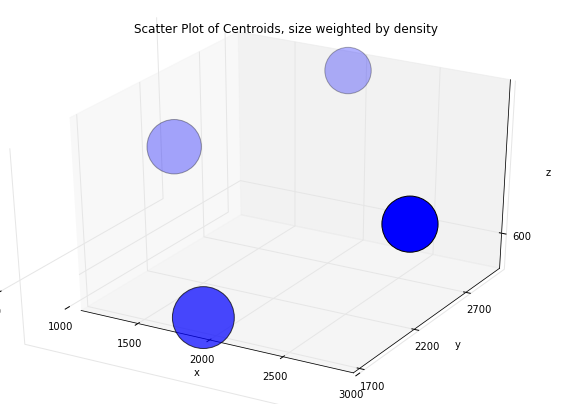

In [36]:
import sklearn.mixture as mixture

n_clusters = 4
###########################################
gmm = mixture.GMM(n_components=n_clusters, n_iter=1000, covariance_type='diag', random_state=1)
clusters = [[] for i in xrange(n_clusters)]
centroidmatrix = [0]*4
print centroidmatrix

predicted = gmm.fit_predict(data_density)
for label, row in zip(predicted, data_density[:,]):
    clusters[label].append(row)

    
for i in xrange(n_clusters):
    clusters[i] = np.array(clusters[i])
    print "# of samples in cluster %d: %d" % (i+1, len(clusters[i])) 
    print "centroid: ", np.average(clusters[i], axis=0)
    centroidmatrix = np.vstack((centroidmatrix,np.average(clusters[i], axis=0)))
    # print "cluster covariance: "
    covar = np.cov(clusters[i].T)
    # print covar
    print "determinant of covariance matrix: ", np.linalg.det(covar)
    print

centroidmatrix = np.delete(centroidmatrix, (0), axis = 0)  
    
print centroidmatrix


fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
ax.view_init()
ax.dist = 10  # distance
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Scatter Plot of Centroids, size weighted by density')


ax.set_xticks(np.arange(500, 3500, 500))
ax.set_yticks(np.arange(1200,3200, 500))
ax.set_zticks(np.arange(0,1200, 150))


ax.scatter(
       centroidmatrix[:, 0], centroidmatrix[:, 1], centroidmatrix[:, 2],  # data
       c='blue',  # marker colour
       marker='o',  # marker shape
       s=centroidmatrix[:,3]*10  # marker size
)




plt.show

## 4) Hex plot

hexbin for bottom 4 levels... doesn't seem to be anything interesting... only to realize bins may be too small and are just points (w/o density data)... >.<

uniques
index: [ 0 18 22 24  2  5  8  1 13  6 32]
counts: [1824 1732 1728 1832 1852 1816 1840 1858 1811 1853 1854]
values: [   55.   166.   277.   388.   499.   610.   721.   832.   943.  1054.
  1165.]
uniques check
index: [0]
counts: [1824]
values: [ 55.]


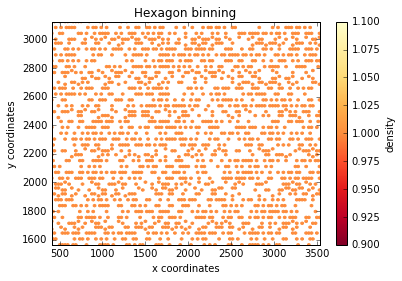

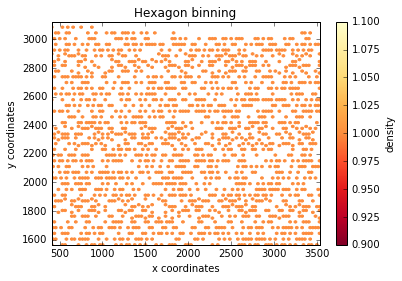

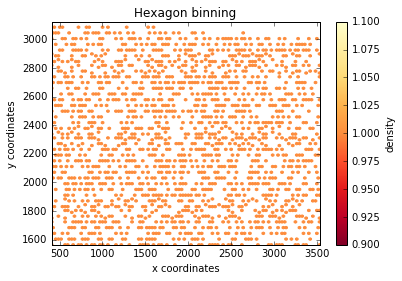

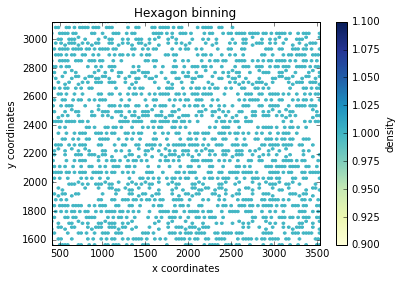

In [44]:
from mpl_toolkits.mplot3d import Axes3D

# Random Sample

samples = 20000
perm = np.random.permutation(xrange(1, len(data_density[:])))
data_density_sample = data_density[perm[:samples]]

data_uniques, UIndex, UCounts = np.unique(data_density_sample[:,2], return_index = True, return_counts = True)

print 'uniques'
print 'index: ' + str(UIndex)
print 'counts: ' + str(UCounts)
print 'values: ' + str(data_uniques)

xmin = data_density_sample[:,0].min()
xmax = data_density_sample[:,0].max()
ymin = data_density_sample[:,1].min()
ymax = data_density_sample[:,1].max()

def check_z(row):
    if row[2] == 55:
        return True
    return False

index_true = np.where(np.apply_along_axis(check_z, 1, data_density_sample))
dds55 = data_density_sample[index_true]

data_uniques, UIndex, UCounts = np.unique(dds55[:,2], return_index = True, return_counts = True)

print 'uniques check'
print 'index: ' + str(UIndex)
print 'counts: ' + str(UCounts)
print 'values: ' + str(data_uniques)

#plt.subplots_adjust(hspace=1)
#plt.subplot(121)
plt.hexbin(dds55[:,0], dds55[:,1], cmap=plt.cm.YlOrRd_r,mincnt=1)
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Hexagon binning")
plt.xlabel('x coordinates')
plt.ylabel('y coordinates')
cb = plt.colorbar()
cb.set_label('density')

plt.show()

def check_z(row):
    if row[2] == 166:
        return True
    return False

index_true = np.where(np.apply_along_axis(check_z, 1, data_density_sample))
ddsZ = data_density_sample[index_true]

plt.hexbin(ddsZ[:,0], ddsZ[:,1], cmap=plt.cm.YlOrRd_r,mincnt=1)
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Hexagon binning")
plt.xlabel('x coordinates')
plt.ylabel('y coordinates')
cb = plt.colorbar()
cb.set_label('density')

plt.show()

def check_z(row):
    if row[2] == 277:
        return True
    return False

index_true = np.where(np.apply_along_axis(check_z, 1, data_density_sample))
ddsZ = data_density_sample[index_true]

plt.hexbin(ddsZ[:,0], ddsZ[:,1], cmap=plt.cm.YlOrRd_r,mincnt=1)
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Hexagon binning")
plt.xlabel('x coordinates')
plt.ylabel('y coordinates')
cb = plt.colorbar()
cb.set_label('density')

plt.show()

def check_z(row):
    if row[2] == 388:
        return True
    return False

index_true = np.where(np.apply_along_axis(check_z, 1, data_density_sample))
ddsZ = data_density_sample[index_true]

plt.hexbin(ddsZ[:,0], ddsZ[:,1], cmap=plt.cm.YlGnBu,mincnt=1)
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Hexagon binning")
plt.xlabel('x coordinates')
plt.ylabel('y coordinates')
cb = plt.colorbar()
cb.set_label('density')

plt.show()

## 5) Stats of spike shown to Jovo

... something isnt right though....

In [47]:

def check_spike(row):
    if row[3] > 0.0013 and row[3] < 0.00135 :
        return True
    return False

index_true = np.where(np.apply_along_axis(check_z, 1, data_density))
spike = data_density[index_true]

print "Spike"
print "length: ", len(spike)
print "Mean: ", np.mean(spike)
print "Median: ", np.mean(spike)
print "STD: ", np.std(spike)

Spike
length:  3233
Mean:  1244.60483891
Median:  1244.60483891
STD:  1038.56930695


## Explore the spike